In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_csv("/Users/../Downloads/NHIS_2019_to_2022_data (2).csv")

df

,Unnamed: 0,Survey Year,NCHS Urban-Rural Classification,Household region,Hispanic ethnicity of SA,Sex,Age,Health insurance hierarchy under 65 Code Description Frequency Percent,Health Insurance hierarchy 65+ Code Description Frequency Percent,Lung Cancer,Out-of-pocket premium cost - plan 1,Deductible - plan 1,Plan pays for prescription drug - plan 1,"Problems paying medical bills, past 12m",Delayed medical care due to cost
0,0,2019,Medium and small metro,South,No,Female,70,NaN,Private,1.0,1200.0,No,Yes,No,No
1,1,2019,Large central metro,Midwest,No,Female,59,Private,NaN,1.0,4420.0,Yes,Yes,Yes,No
2,2,2019,Large fringe metro,West,No,Female,85,NaN,Private,1.0,156.0,Yes,No,No,No
3,3,2019,Medium and small metro,West,No,Female,82,NaN,Private,1.0,1284.0,No,No,No,No
4,4,2019,Large fringe metro,South,No,Male,51,Private,NaN,1.0,4160.0,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,164,2022,Medium and small metro,West,No,Female,76,NaN,Private,1.0,2412.0,Yes,No,No,No
165,165,2022,Large fringe metro,Northeast,No,Female,74,NaN,Private,1.0,1476.0,Yes,Yes,No,No
166,166,2022,Medium and small metro,South,No,Male,59,Private,NaN,1.0,52.0,Yes,Yes,No,No
167,167,2022,Large central metro,South,No,Male,81,NaN,Private,1.0,3600.0,No,No,No,No


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 15 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Unnamed: 0                                                              169 non-null    int64  
 1   Survey Year                                                             169 non-null    int64  
 2   NCHS Urban-Rural Classification                                         169 non-null    object 
 3   Household region                                                        169 non-null    object 
 4    Hispanic ethnicity of SA                                               169 non-null    object 
 5   Sex                                                                     169 non-null    object 
 6   Age                                                                     169 non-nu

In [105]:
df[' Out-of-pocket premium cost - plan 1']

0      1200.0
1      4420.0
2       156.0
3      1284.0
4      4160.0
        ...  
164    2412.0
165    1476.0
166      52.0
167    3600.0
168    3500.0
Name:  Out-of-pocket premium cost - plan 1, Length: 169, dtype: float64

In [96]:
# which column have the most missing values?

def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    
     
    missing_values = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    
    types =[]
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
        
    missing_values['Type']=type
    missing_values.sort_values('Total',ascending=False,inplace=True)
    
    return (np.transpose(missing_values))

In [97]:
missing_data(df)

,Health insurance hierarchy under 65 Code Description Frequency Percent,Health Insurance hierarchy 65+ Code Description Frequency Percent,Unnamed: 0,Survey Year,NCHS Urban-Rural Classification,Household region,Hispanic ethnicity of SA,Sex,Age,Lung Cancer,Out-of-pocket premium cost - plan 1,Deductible - plan 1,Plan pays for prescription drug - plan 1,"Problems paying medical bills, past 12m",Delayed medical care due to cost
Total,131,38,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,77.5148,22.4852,0,0,0,0,0,0,0,0,0,0,0,0,0
Type,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>


In [47]:
df['Health insurance hierarchy under 65 Code Description Frequency Percent']=df['Health insurance hierarchy under 65 Code Description Frequency Percent'].fillna(df['Health insurance hierarchy under 65 Code Description Frequency Percent'].mode()[0])

In [50]:
df['Health Insurance hierarchy 65+ Code Description Frequency Percent']=df['Health Insurance hierarchy 65+ Code Description Frequency Percent'].fillna(df['Health Insurance hierarchy 65+ Code Description Frequency Percent'].mode()[0])

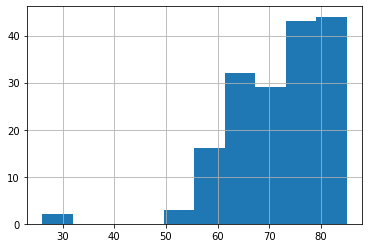

In [52]:
df['Age'].hist()

Unnamed: 0
Skew : 0.0


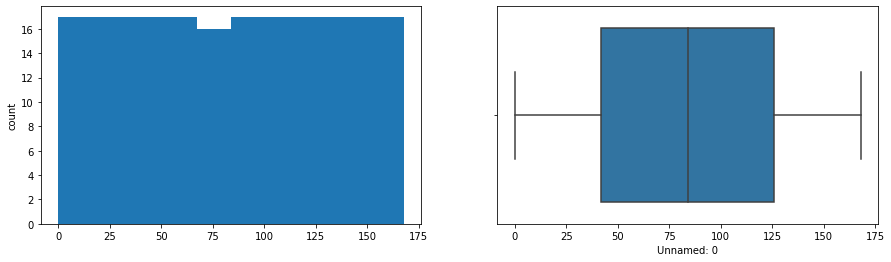

Survey Year
Skew : 0.04


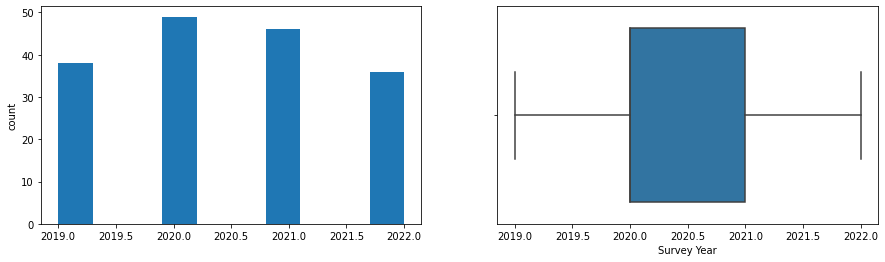

Age
Skew : -1.16


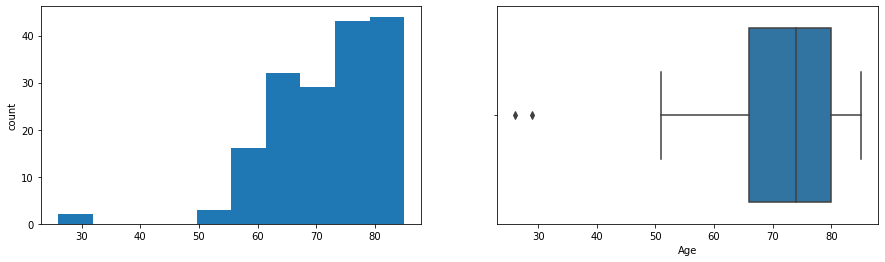

In [136]:
result = df.select_dtypes(include='int64')

cont_cols = list(result)
for col in cont_cols:
    print(col)
    print('Skew :', round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=10, grid=False)
    
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    
    plt.show()

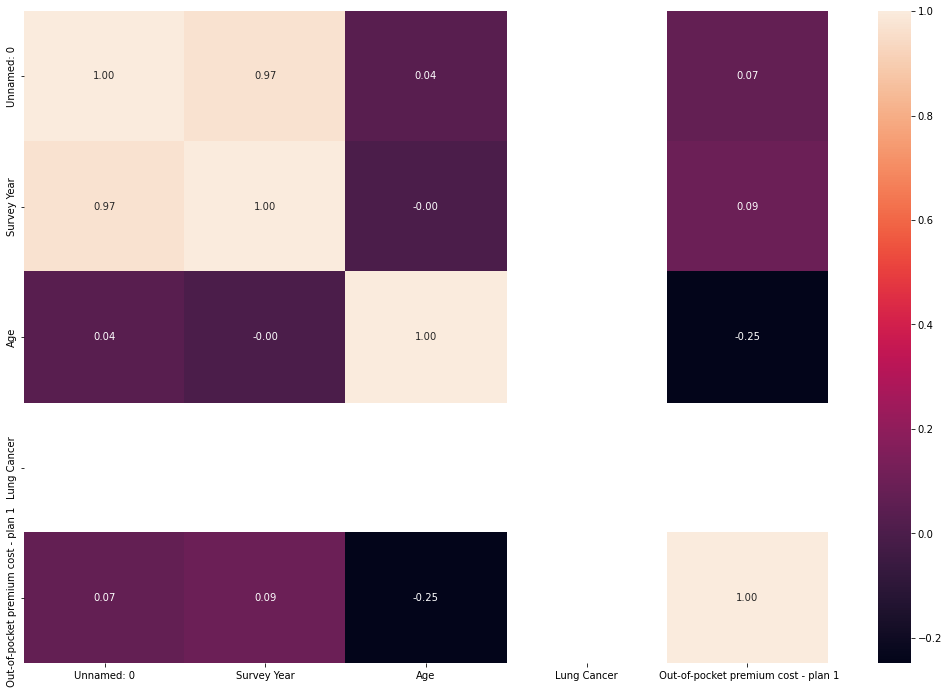

In [54]:
plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(), annot=True, fmt = '0.2f')

plt.show()

In [62]:
num_col = df.select_dtypes(exclude='object')
num_col.drop(columns='Unnamed: 0')

,Survey Year,Age,Lung Cancer,Out-of-pocket premium cost - plan 1
0,2019,70,1.0,1200.0
1,2019,59,1.0,4420.0
2,2019,85,1.0,156.0
3,2019,82,1.0,1284.0
4,2019,51,1.0,4160.0
...,...,...,...,...
164,2022,76,1.0,2412.0
165,2022,74,1.0,1476.0
166,2022,59,1.0,52.0
167,2022,81,1.0,3600.0


<ipython-input-65-80aa7b861ec3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_col[i])


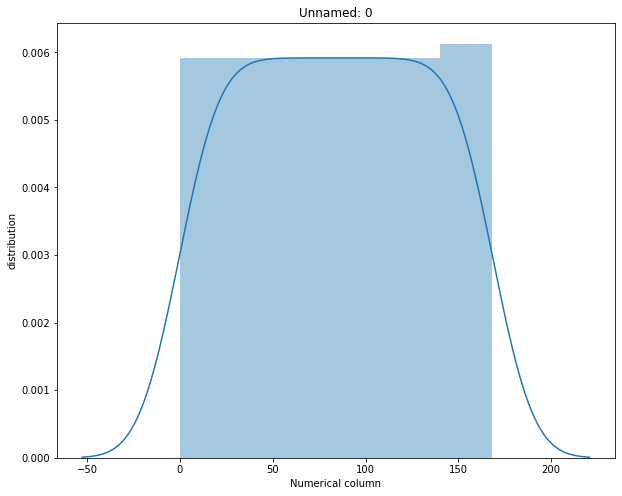

<ipython-input-65-80aa7b861ec3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_col[i])


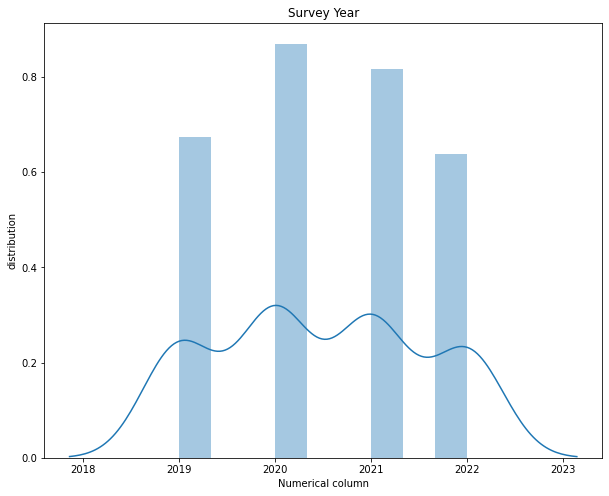

<ipython-input-65-80aa7b861ec3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_col[i])


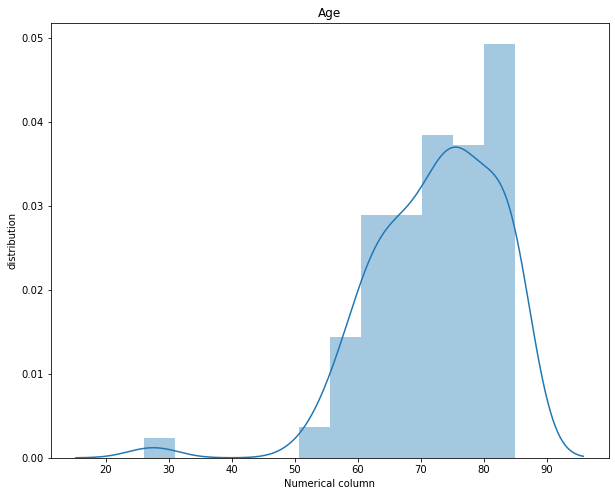

<ipython-input-65-80aa7b861ec3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_col[i])
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


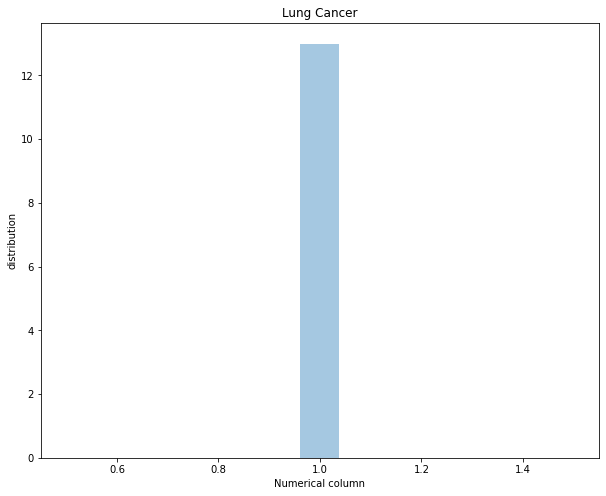

<ipython-input-65-80aa7b861ec3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_col[i])


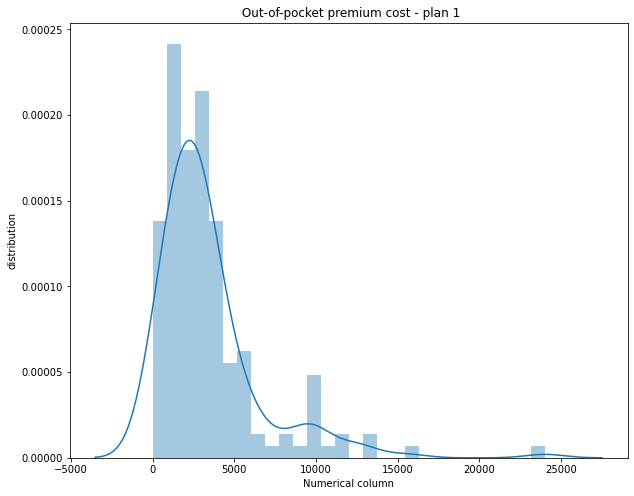

In [65]:
for i in num_col:
    plt.figure(figsize=(10,8))
    
    sns.distplot(x=num_col[i])
    plt.title(i)
    plt.xlabel("Numerical column")
    plt.ylabel('distribution')
    plt.show()

In [106]:
print("Skeness: %f" % df[' Out-of-pocket premium cost - plan 1'].skew())

Skeness: 2.619865


In [109]:
df['Household region'].value_counts()

South        62
Midwest      40
Northeast    34
West         33
Name: Household region, dtype: int64

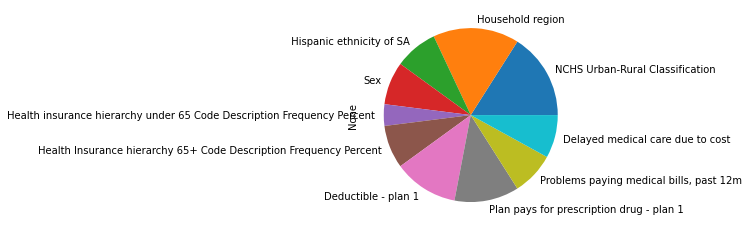

In [116]:
unique_types = df.select_dtypes(include='object').nunique()
unique_types
unique_types.plot(kind='pie')

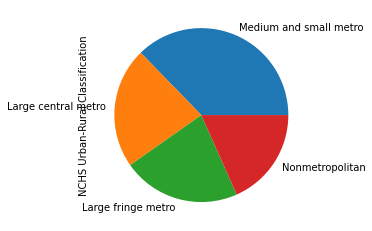

In [114]:
df['NCHS Urban-Rural Classification'].value_counts().plot(kind='pie')

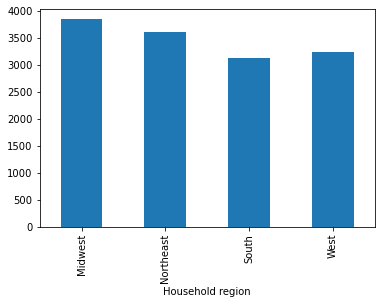

In [117]:
# household mean based on race

df.groupby(df['Household region'])[' Out-of-pocket premium cost - plan 1'].mean().plot(kind='bar')

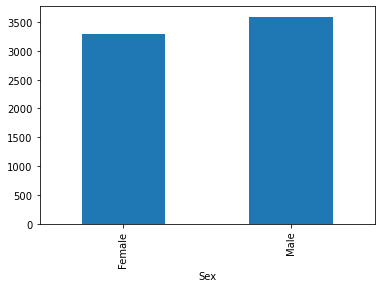

In [119]:
# race distributions on different age group
# age distributions on different sex


df.groupby(df['Sex'])[' Out-of-pocket premium cost - plan 1'].mean().plot(kind='bar')

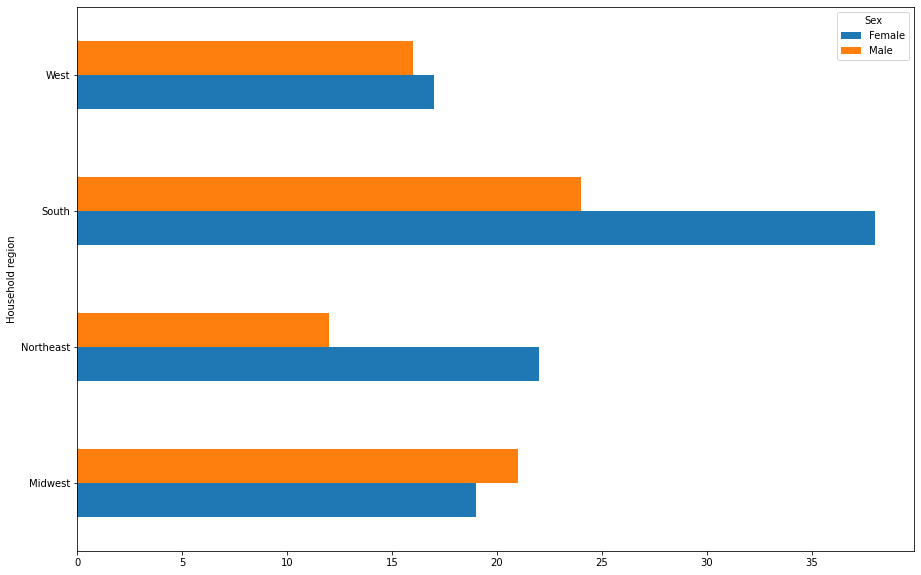

In [121]:
# different 

pd.crosstab(index=df['Household region'],columns=df['Sex'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

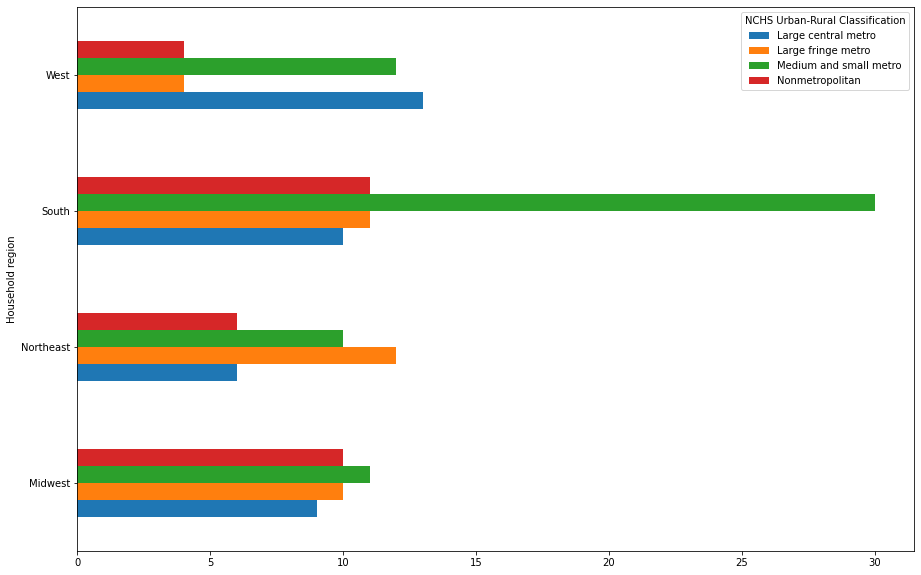

In [122]:
pd.crosstab(index=df['Household region'],columns=df['NCHS Urban-Rural Classification'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

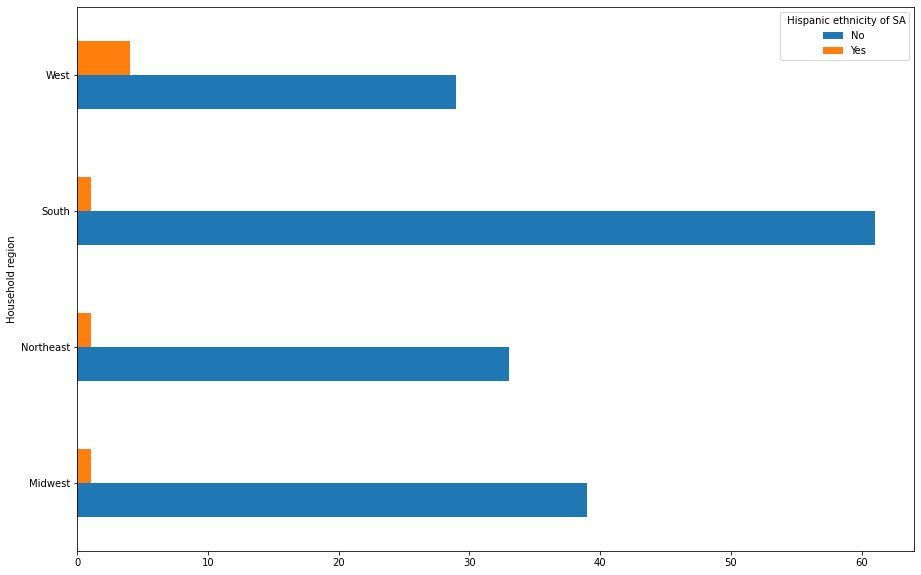

In [129]:
pd.crosstab(index=df['Household region'],columns=df[' Hispanic ethnicity of SA'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

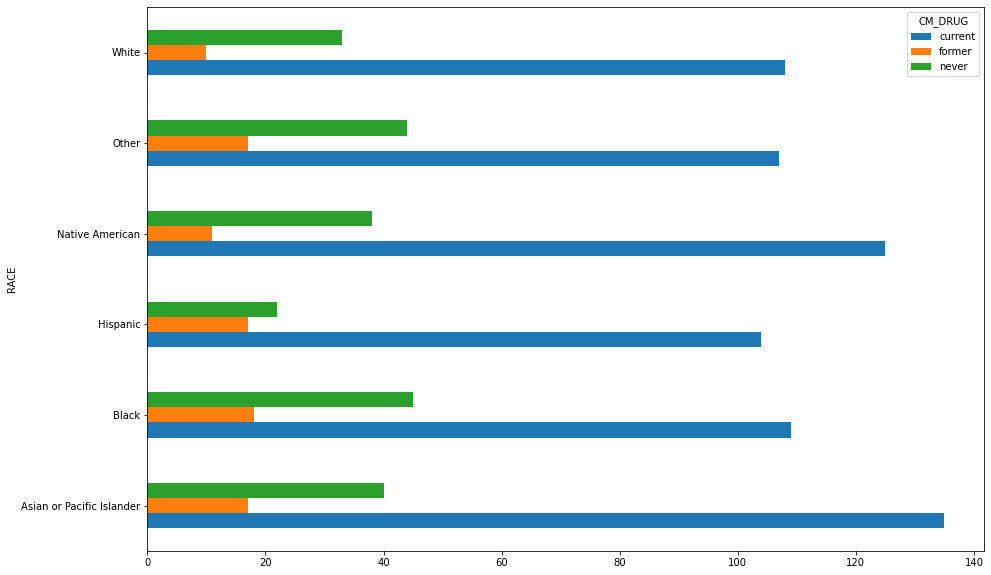

In [45]:
pd.crosstab(index=df['RACE'],columns=df['CM_DRUG'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

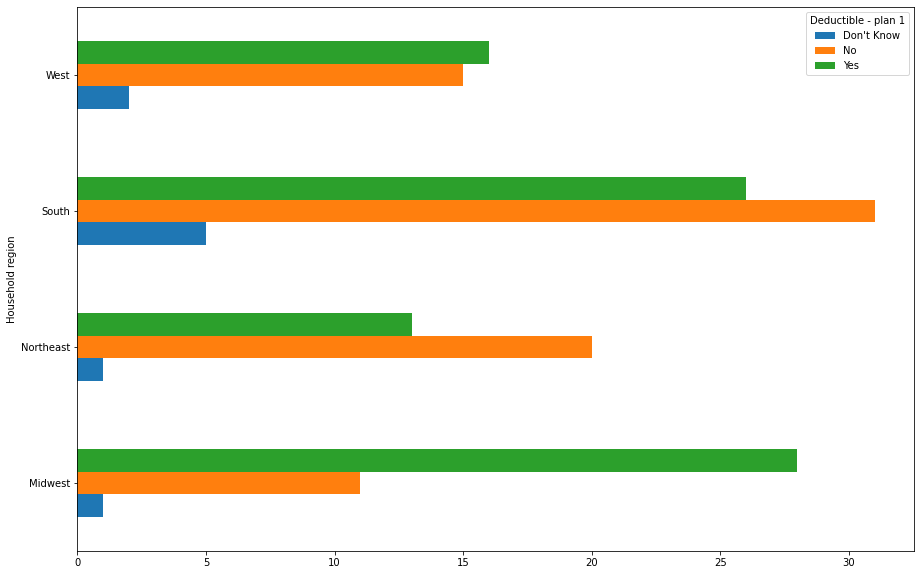

In [132]:
pd.crosstab(index=df['Household region'],columns=df['Deductible - plan 1'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

In [153]:
df['NCHS Urban-Rural Classification'].value_counts()

Medium and small metro    63
Large central metro       38
Large fringe metro        37
Nonmetropolitan           31
Name: NCHS Urban-Rural Classification, dtype: int64

In [166]:
# 2019, urban-rural classification distribution based on region

 Household_region= df[df['Survey Year']==2019].groupby('Household region')\
      .aggregate({'NCHS Urban-Rural Classification':'count'})\
      .sort_values('NCHS Urban-Rural Classification',ascending=False)
    


Text(0.5, 1.0, 'Household_region:Urban-Rural Classification')

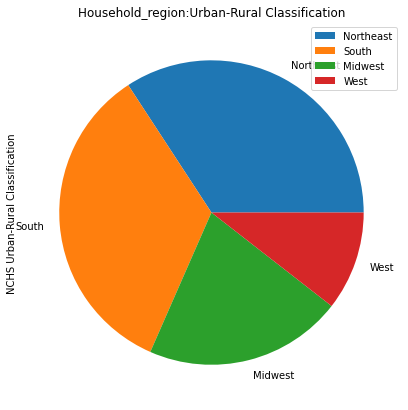

In [168]:
Household_region.plot(kind='pie',subplots=True,figsize=(10,7))
plt.title('2019 Household_region:Urban-Rural Classification')

In [170]:
#
Household_region= df[df['Survey Year']==2020].groupby('Household region')\
      .aggregate({'NCHS Urban-Rural Classification':'count'})\
      .sort_values('NCHS Urban-Rural Classification',ascending=False)

Text(0.5, 1.0, '2020 Household_region:Urban-Rural Classification')

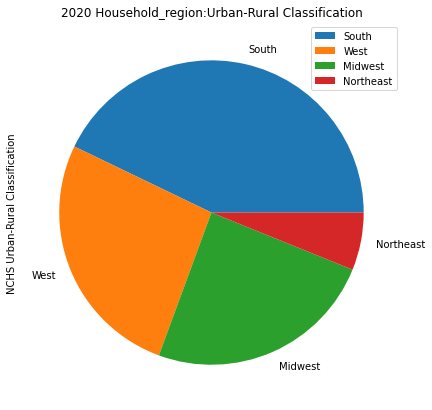

In [171]:
Household_region.plot(kind='pie',subplots=True,figsize=(10,7))
plt.title('2020 Household_region:Urban-Rural Classification')

Text(0.5, 1.0, '2021 Household_region:Urban-Rural Classification')

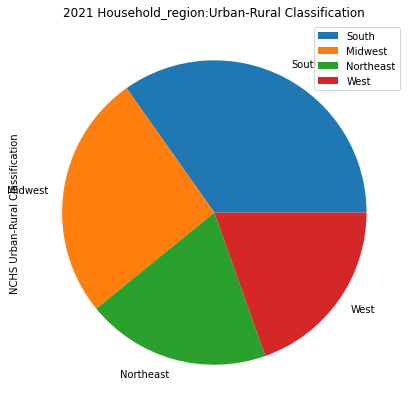

In [173]:
Household_region= df[df['Survey Year']==2021].groupby('Household region')\
      .aggregate({'NCHS Urban-Rural Classification':'count'})\
      .sort_values('NCHS Urban-Rural Classification',ascending=False)

Household_region.plot(kind='pie',subplots=True,figsize=(10,7))
plt.title('2021 Household_region:Urban-Rural Classification')

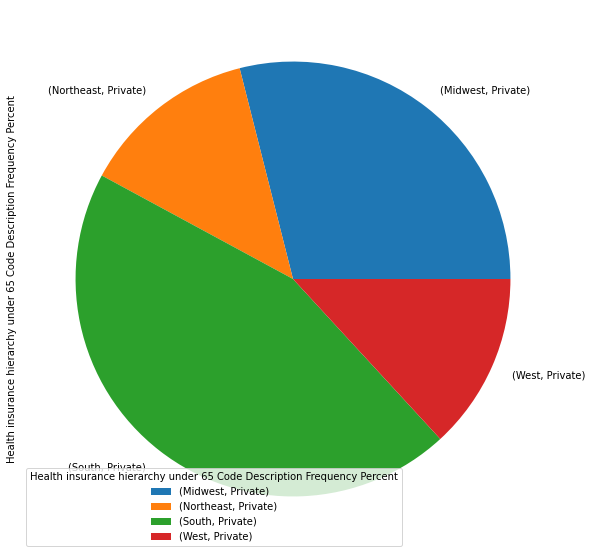

In [176]:
# Health insurance hierarchy under 65 Code Description Frequency Percent istribution on region

df.groupby(['Household region','Health insurance hierarchy under 65 Code Description Frequency Percent'])['Health insurance hierarchy under 65 Code Description Frequency Percent'].count().plot(kind='pie',figsize=(15,10))

plt.legend(title='Health insurance hierarchy under 65 Code Description Frequency Percent')

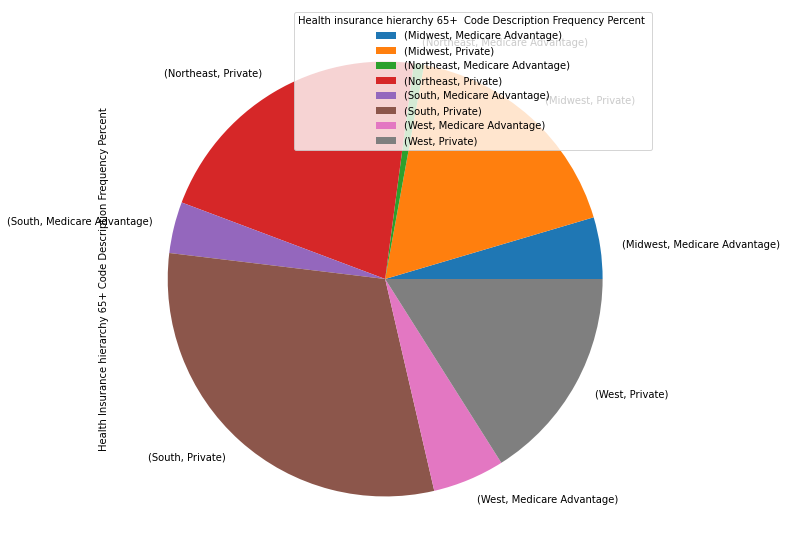

In [178]:
df.groupby(['Household region','Health Insurance hierarchy 65+ Code Description Frequency Percent'])['Health Insurance hierarchy 65+ Code Description Frequency Percent'].count().plot(kind='pie',figsize=(15,10))
plt.legend(title='Health insurance hierarchy 65+  Code Description Frequency Percent ')

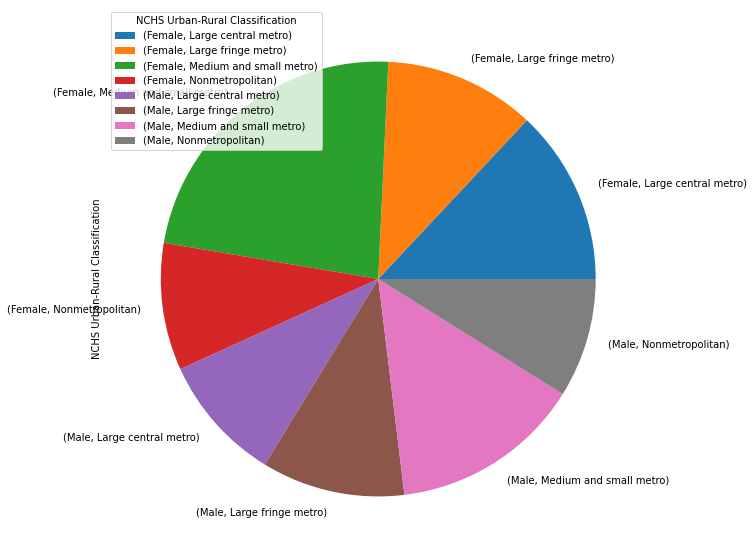

In [179]:
# sex distriution in urban-rural classification

df.groupby(['Sex','NCHS Urban-Rural Classification'])['NCHS Urban-Rural Classification'].count().plot(kind='pie',figsize=(15,10))
plt.legend(title='NCHS Urban-Rural Classification')

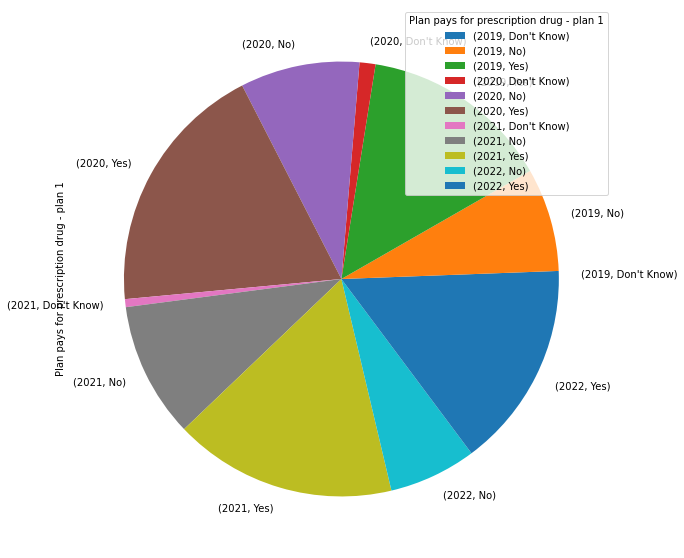

In [182]:
# plan 1 based on year

df.groupby(['Survey Year','Plan pays for prescription drug - plan 1'])['Plan pays for prescription drug - plan 1'].count().plot(kind='pie',figsize=(15,10))
plt.legend(title='Plan pays for prescription drug - plan 1')

In [201]:
cat_col = df.select_dtypes(include=['object'])
cat_col

num_col = df.select_dtypes(exclude=['object'])
#num_col.drop(columns='Unnamed:0')

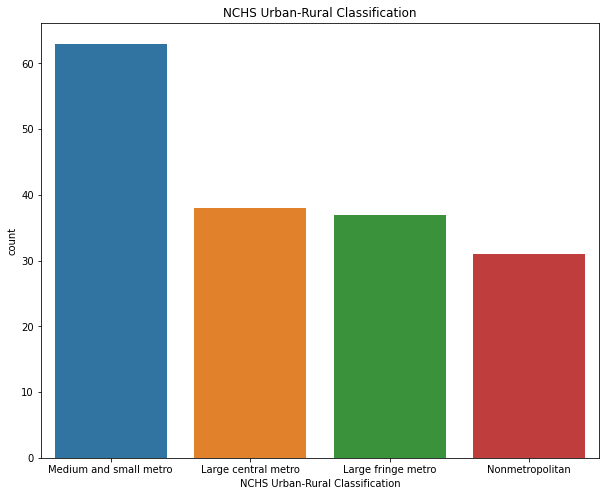

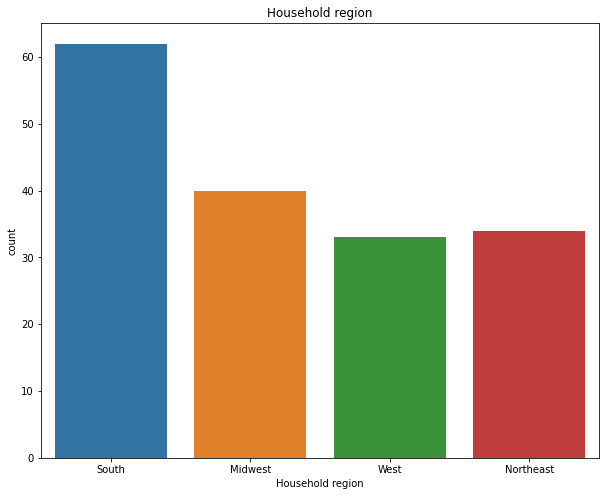

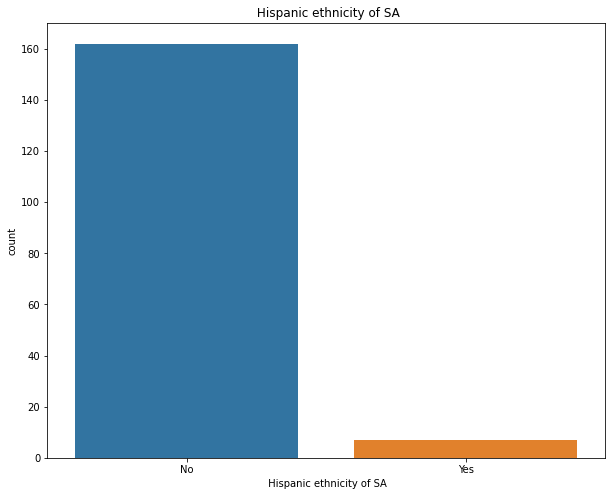

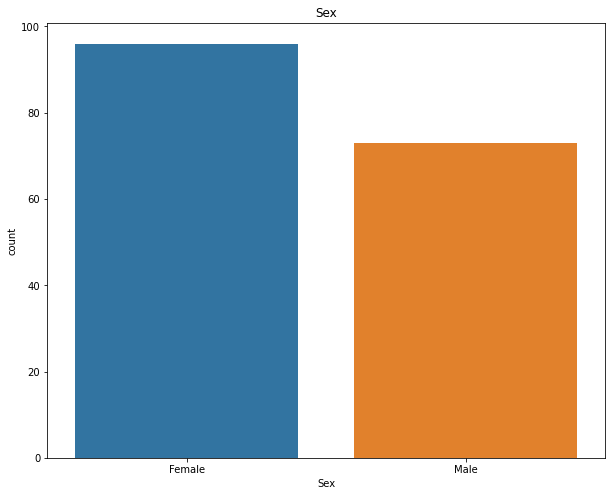

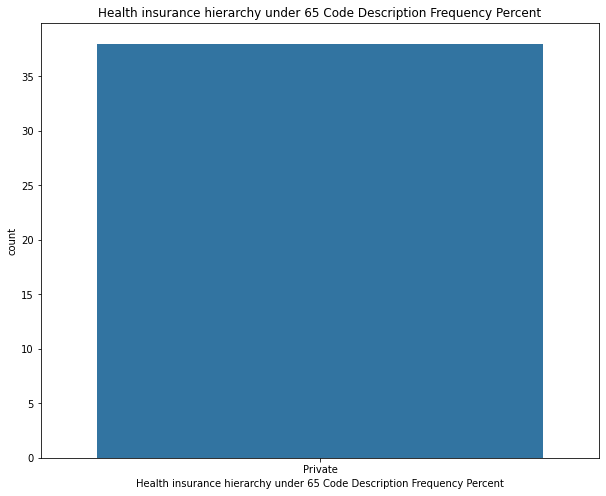

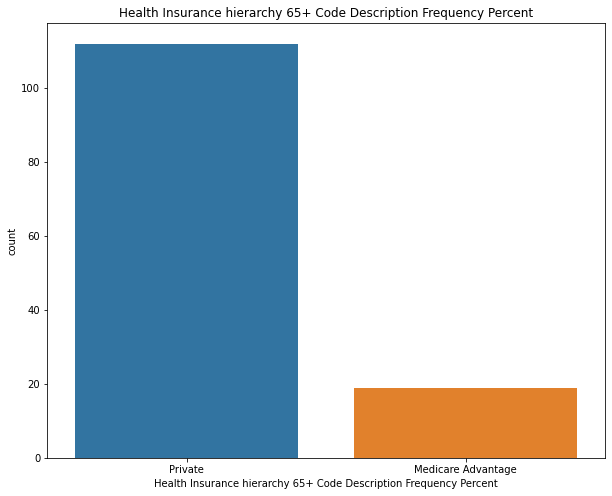

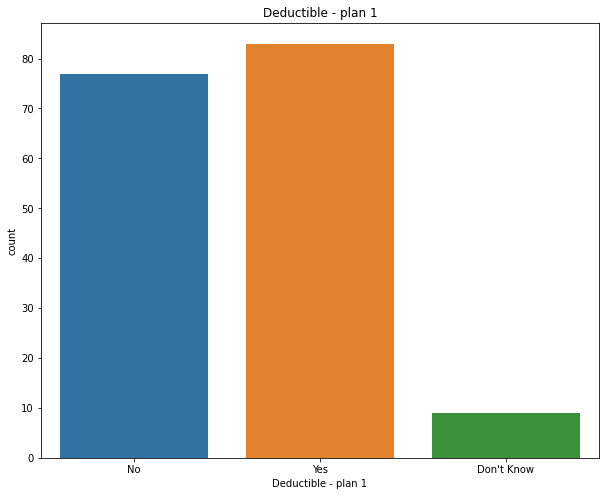

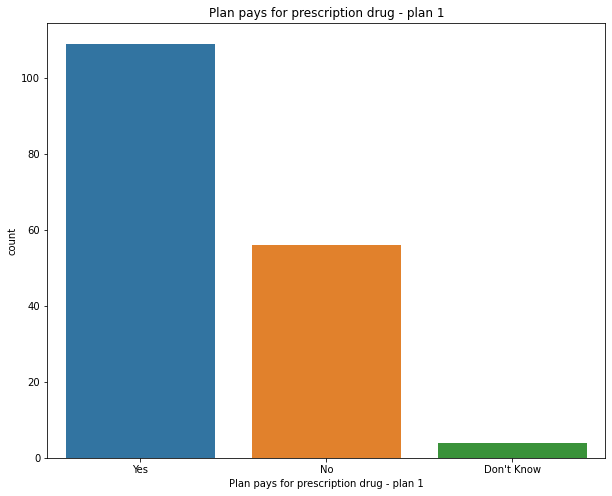

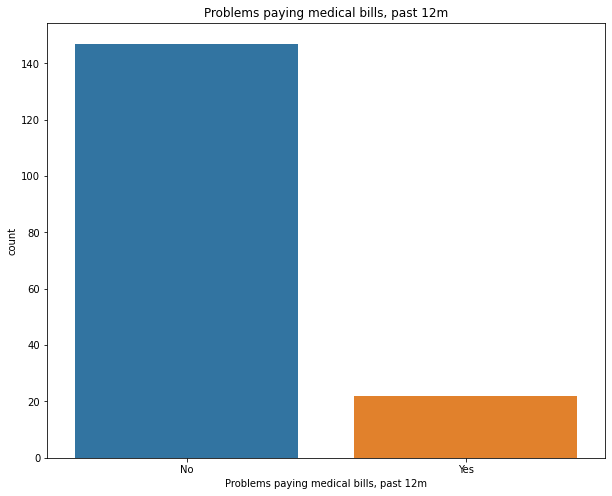

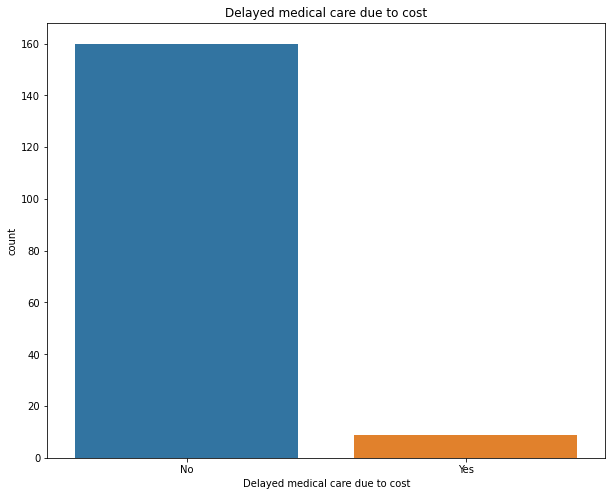

In [148]:
for i in cat_col:
    plt.figure(figsize=(10,8))
    
    sns.countplot(x=cat_col[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()


In [193]:
num_col

,Unnamed: 0,Survey Year,Age,Lung Cancer,Out-of-pocket premium cost - plan 1
0,0,2019,70,1.0,1200.0
1,1,2019,59,1.0,4420.0
2,2,2019,85,1.0,156.0
3,3,2019,82,1.0,1284.0
4,4,2019,51,1.0,4160.0
...,...,...,...,...,...
164,164,2022,76,1.0,2412.0
165,165,2022,74,1.0,1476.0
166,166,2022,59,1.0,52.0
167,167,2022,81,1.0,3600.0


In [199]:
 def box_plot(df, num_col, cat_col,var):
    
    df = pd.concat([num_col,cat_col],axis=1)
    for i in cat_col.columns:
        
        df.boxplot(column=var,by=i)
        plt.xlabel(i)
        plt.ylabel(var)
        plt.show()


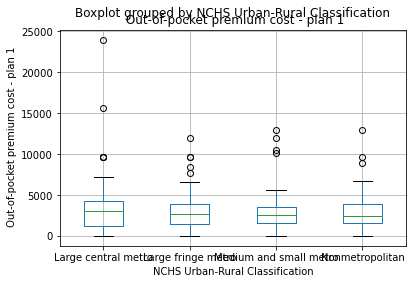

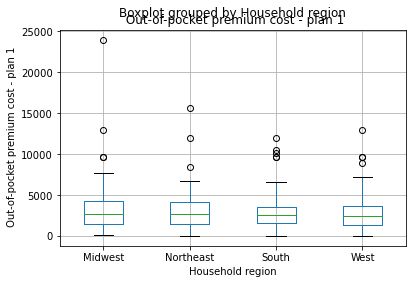

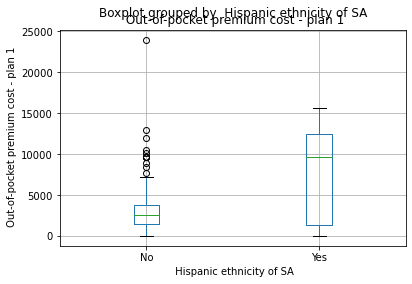

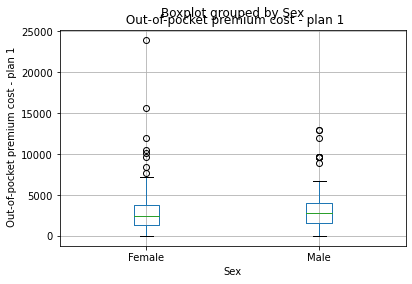

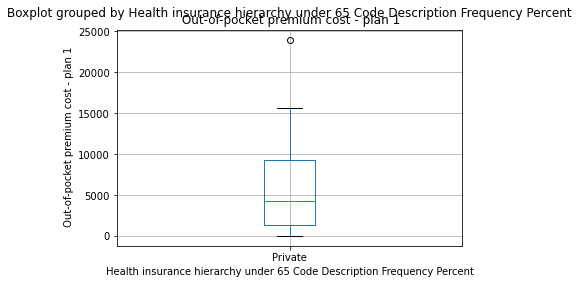

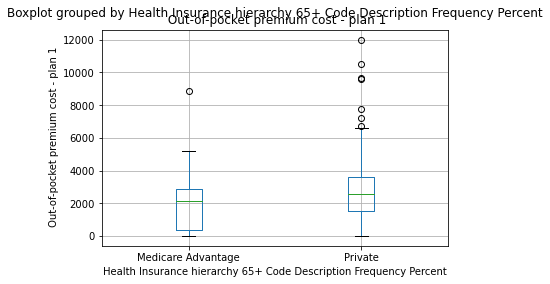

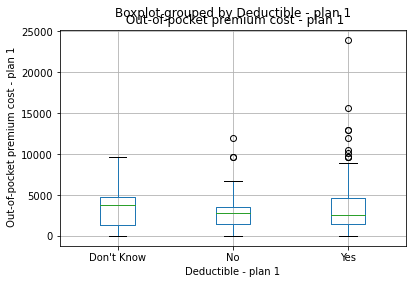

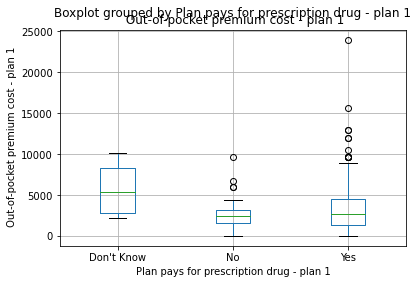

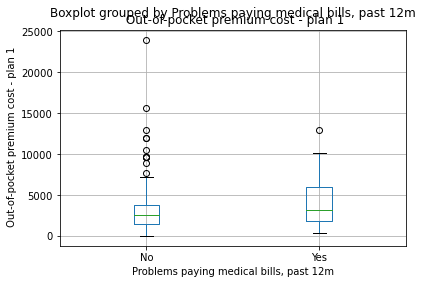

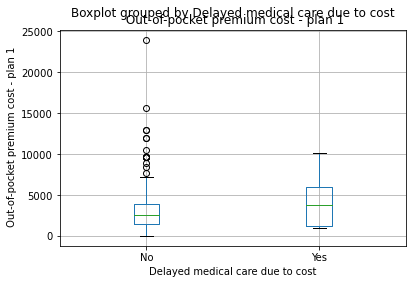

In [200]:
box_plot(df,num_col,cat_col,' Out-of-pocket premium cost - plan 1')